In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [55]:
#여러 오류를 만날 수 있기에 무시하기 위해 지정함
import warnings
warnings.filterwarnings("ignore")

In [57]:
# matplotlib에 사용할 기본 폰트를 지정
from matplotlib import rcParams
rcParams["font.family"] = "Noto Sans KR"
rcParams["axes.unicode_minus"] = False #축에 음수 표현안되면, False 처리해줌

In [56]:
#한글을 쓰기 위해 지정하기 위한 폰트 검색
import matplotlib.font_manager as fm

for i in fm.fontManager.ttflist:
    if i.name.find("Noto") != -1:    #Gulim, Gothic ...
        print(i.name)

Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR


In [3]:

df_own = pd.read_excel('./data/projects/주간 아파트 매매가격지수_20241026.xlsx')
df_rent = pd.read_excel('./data/projects/주간 아파트 전세가격지수_20241026.xlsx')

In [505]:
df_own.head(1)

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,2022-12-26 00:00:52,2023-01-02 00:00:52,2023-01-09 00:00:52,2023-01-16 00:00:52,2023-01-30 00:00:52,2023-02-06 00:00:52,2023-02-13 00:00:52,2023-02-20 00:00:52,2023-02-27 00:00:52,2023-03-06 00:00:52,2023-03-13 00:00:52,2023-03-20 00:00:52,2023-03-27 00:00:52,2023-04-03 00:00:52,2023-04-10 00:00:52,2023-04-17 00:00:52,2023-04-24 00:00:52,2023-05-01 00:00:52,2023-05-08 00:00:52,2023-05-15 00:00:52,2023-05-22 00:00:52,2023-05-29 00:00:52,2023-06-05 00:00:52,2023-06-12 00:00:52,2023-06-19 00:00:52,2023-06-26 00:00:52,2023-07-03 00:00:52,2023-07-10 00:00:52,2023-07-17 00:00:52,2023-07-24 00:00:52,2023-07-31 00:00:52,2023-08-07 00:00:52,2023-08-14 00:00:52,2023-08-21 00:00:52,2023-08-28 00:00:52,2023-09-04 00:00:52,2023-09-11 00:00:52,2023-09-18 00:00:52,2023-09-25 00:00:52,2023-10-09 00:00:52,2023-10-16 00:00:52,2023-10-23 00:00:52,2023-10-30 00:00:52,2023-11-06 00:00:52,2023-11-13 00:00:52,2023-11-20 00:00:52,2023-11-27 00:00:52,2023-12-04 00:00:52,2023-12-11 00:00:52,2023-12-18 00:00:52,2023-12-25 00:00:52,2024.01.01,2024-01-08 00:00:52,2024-01-15 00:00:52,2024-01-22 00:00:52,2024-01-29 00:00:52,2024-02-05 00:00:52,2024-02-19 00:00:52,2024-02-26 00:00:52,2024-03-04 00:00:52,2024-03-11 00:00:52,2024-03-18 00:00:52,2024-03-25 00:00:52,2024-04-01 00:00:52,2024-04-08 00:00:52,2024-04-15 00:00:52,2024-04-22 00:00:52,2024-04-29 00:00:52,2024-05-06 00:00:52,2024-05-13 00:00:52,2024-05-20 00:00:52,2024-05-27 00:00:52,2024-06-03 00:00:52,2024-06-10 00:00:52,2024-06-17 00:00:52,2024-06-24 00:00:52,2024-07-01 00:00:52,2024-07-08 00:00:52,2024-07-15 00:00:52,2024-07-22 00:00:52,2024-07-29 00:00:52,2024-08-05 00:00:52,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52,gubun
0,전국,99.070849,98.795106,98.501147,98.057422,97.67074,97.354538,96.888385,96.569873,96.149852,95.792512,95.439004,95.081119,94.724287,94.349139,93.963412,93.626154,93.29091,93.041542,92.787613,92.481888,92.082914,91.858702,91.601077,91.424186,91.195593,91.044424,90.922331,90.805239,90.647565,90.547996,90.482128,90.418179,90.328878,90.243497,90.183055,90.143591,90.089143,90.047111,90.031037,90.016634,90.004161,90.011772,90.026286,90.0501,90.064808,90.088355,90.11239,90.135376,90.151876,90.171682,90.186603,90.187561,90.189461,90.177104,90.151897,90.132002,90.113965,90.080022,90.055389,90.038901,90.007688,89.976864,89.940106,89.908815,89.872646,89.842256,89.812152,89.765482,89.736383,89.697577,89.666257,89.636044,89.585278,89.549447,89.503353,89.471157,89.441427,89.414999,89.387179,89.363883,89.329602,89.315738,89.302354,89.296853,89.288007,89.288654,89.279612,89.300558,89.315659,89.344631,89.360992,89.405868,89.439824,89.486678,89.53072,89.566492,89.596423,89.61543,89.641072,89.660654,89.659354,own


In [25]:
df_rent.head(1)

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,2022-12-26 00:00:52,2023-01-02 00:00:52,2023-01-09 00:00:52,2023-01-16 00:00:52,2023-01-30 00:00:52,2023-02-06 00:00:52,2023-02-13 00:00:52,2023-02-20 00:00:52,2023-02-27 00:00:52,2023-03-06 00:00:52,2023-03-13 00:00:52,2023-03-20 00:00:52,2023-03-27 00:00:52,2023-04-03 00:00:52,2023-04-10 00:00:52,2023-04-17 00:00:52,2023-04-24 00:00:52,2023-05-01 00:00:52,2023-05-08 00:00:52,2023-05-15 00:00:52,2023-05-22 00:00:52,2023-05-29 00:00:52,2023-06-05 00:00:52,2023-06-12 00:00:52,2023-06-19 00:00:52,2023-06-26 00:00:52,2023-07-03 00:00:52,2023-07-10 00:00:52,2023-07-17 00:00:52,2023-07-24 00:00:52,2023-07-31 00:00:52,2023-08-07 00:00:52,2023-08-14 00:00:52,2023-08-21 00:00:52,2023-08-28 00:00:52,2023-09-04 00:00:52,2023-09-11 00:00:52,2023-09-18 00:00:52,2023-09-25 00:00:52,2023-10-09 00:00:52,2023-10-16 00:00:52,2023-10-23 00:00:52,2023-10-30 00:00:52,2023-11-06 00:00:52,2023-11-13 00:00:52,2023-11-20 00:00:52,2023-11-27 00:00:52,2023-12-04 00:00:52,2023-12-11 00:00:52,2023-12-18 00:00:52,2023-12-25 00:00:52,2024.01.01,2024-01-08 00:00:52,2024-01-15 00:00:52,2024-01-22 00:00:52,2024-01-29 00:00:52,2024-02-05 00:00:52,2024-02-19 00:00:52,2024-02-26 00:00:52,2024-03-04 00:00:52,2024-03-11 00:00:52,2024-03-18 00:00:52,2024-03-25 00:00:52,2024-04-01 00:00:52,2024-04-08 00:00:52,2024-04-15 00:00:52,2024-04-22 00:00:52,2024-04-29 00:00:52,2024-05-06 00:00:52,2024-05-13 00:00:52,2024-05-20 00:00:52,2024-05-27 00:00:52,2024-06-03 00:00:52,2024-06-10 00:00:52,2024-06-17 00:00:52,2024-06-24 00:00:52,2024-07-01 00:00:52,2024-07-08 00:00:52,2024-07-15 00:00:52,2024-07-22 00:00:52,2024-07-29 00:00:52,2024-08-05 00:00:52,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
0,전국,99.3345,99.026016,98.623536,98.108772,97.557092,97.04603,96.402228,95.848864,95.217212,94.621771,94.151049,93.612707,93.071248,92.237368,91.539799,91.085997,90.713107,90.420272,90.132728,89.848629,89.560535,89.329167,89.108817,88.913907,88.745688,88.58591,88.466326,88.35231,88.231831,88.150671,88.076263,88.021321,87.961195,87.883586,87.7736,87.733755,87.688877,87.653398,87.636525,87.596905,87.594955,87.605309,87.634761,87.676299,87.72397,87.777954,87.832803,87.884507,87.951535,88.031956,88.106143,88.169539,88.235838,88.275588,88.307814,88.340026,88.37836,88.409032,88.440381,88.470277,88.482127,88.508743,88.535511,88.575573,88.612075,88.641814,88.680815,88.717713,88.764045,88.805314,88.845726,88.876459,88.899178,88.922887,88.945806,88.965541,88.989038,89.012563,89.04435,89.084822,89.113047,89.138583,89.173103,89.207733,89.242059,89.268162,89.295967,89.338824,89.391488,89.440949,89.490741,89.550844,89.611102,89.672679,89.736133,89.798015,89.844913,89.879095,89.940154,90.000649,90.056928


In [17]:
#테이블 합치기 위한, flag 컬럼 추가
df_own['gubun'] = 'own'
df_rent['gubun'] = 'rent'

In [29]:
#형태 확인
df_own.shape

(278, 103)

In [30]:
#형태 확인
df_rent.shape

(278, 103)

In [31]:
# 컬럼 같은지 확인
df_own.columns == df_rent.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [18]:
#합치기 + 형태 확인 + 새로운 df 구성
df_all = pd.concat([df_own, df_rent])
df_all.shape, df_all.head(5), df_all.tail(5)

((556, 103),
       지역명 2022-10-24 00:00:52 2022-10-31 00:00:52 2022-11-07 00:00:52  \
 0      전국           99.070849           98.795106           98.501147   
 1      서울            99.18946           98.891016           98.575584   
 2  강북14개구           98.642112           98.340583           98.052583   
 3     종로구          101.272184          101.272184          101.268392   
 4      중구           99.717712           99.436605           99.392767   
 
   2022-11-14 00:00:52 2022-11-21 00:00:52 2022-11-28 00:00:52  \
 0           98.057422            97.67074           97.354538   
 1            98.21648           97.889642           97.564187   
 2           97.612834            97.32794           97.032485   
 3          101.099196          101.099196          101.058259   
 4           99.293241           98.213935            97.96398   
 
   2022-12-05 00:00:52 2022-12-12 00:00:52 2022-12-19 00:00:52  ...  \
 0           96.888385           96.569873           96.149852  ...   
 

In [19]:
df_all.select_dtypes(include = 'object').columns[1:-1]

# 각 셀을 숫자로 변환하며, 변환 불가 시 NaN 처리
df_all[df_all.columns[1:-1]] = df_all[df_all.columns[1:-1]].apply(lambda col: pd.to_numeric(col, errors='coerce'))
df_all


,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,...,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52,gubun
0,전국,99.070849,98.795106,98.501147,98.057422,97.670740,97.354538,96.888385,96.569873,96.149852,...,89.439824,89.486678,89.530720,89.566492,89.596423,89.615430,89.641072,89.660654,89.659354,own
1,서울,99.189460,98.891016,98.575584,98.216480,97.889642,97.564187,97.155318,96.809521,96.361279,...,91.783405,92.008437,92.208397,92.354427,92.520904,92.603639,92.700462,92.815979,92.886076,own
2,강북14개구,98.642112,98.340583,98.052583,97.612834,97.327940,97.032485,96.620466,96.316564,95.883823,...,88.818466,88.998513,89.147868,89.256582,89.367506,89.416088,89.494905,89.579069,89.621939,own
3,종로구,101.272184,101.272184,101.268392,101.099196,101.099196,101.058259,101.051544,100.986561,100.986561,...,98.870809,99.008700,99.156805,99.250936,99.319963,99.304188,99.310792,99.308945,99.309707,own
4,중구,99.717712,99.436605,99.392767,99.293241,98.213935,97.963980,97.632394,97.478444,97.451176,...,94.747151,94.884112,95.088102,95.561633,95.700824,95.731491,95.852437,95.935588,96.025635,own
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,무주군,NaN,NaN,NaN,101.195498,101.195498,101.195498,101.195498,101.195498,101.195498,...,117.988925,117.988925,117.988925,117.988925,117.988925,117.988925,117.988925,117.988925,117.988925,rent
274,임실군,NaN,NaN,NaN,101.195498,101.195498,101.195498,101.195498,101.195498,101.195498,...,107.082721,107.082721,107.082721,107.082721,107.082721,107.082721,107.082721,107.082721,107.082721,rent
275,순창군,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.274467,99.274467,99.274467,99.274467,99.274467,99.274467,99.274467,99.274467,99.274467,rent
276,고창군,NaN,NaN,NaN,104.637259,104.637259,104.637259,104.637259,104.637259,104.637259,...,112.145062,112.145062,112.145062,112.145062,113.191030,113.191030,113.191030,113.191030,113.191030,rent


In [20]:
#컬럼 전체 str로 형변환
df_all.columns = df_all.columns.astype('str')

In [21]:
#melt해서 보기 쉽게 하기
df_melt = df_all.melt(id_vars = ['지역명','gubun']
            ,var_name = 'date'
            ,value_name = 'ratio')

df_melt

,지역명,gubun,date,ratio
0,전국,own,2022-10-24 00:00:52,99.070849
1,서울,own,2022-10-24 00:00:52,99.189460
2,강북14개구,own,2022-10-24 00:00:52,98.642112
3,종로구,own,2022-10-24 00:00:52,101.272184
4,중구,own,2022-10-24 00:00:52,99.717712
...,...,...,...,...
56151,무주군,rent,2024-10-21 00:00:52,117.988925
56152,임실군,rent,2024-10-21 00:00:52,107.082721
56153,순창군,rent,2024-10-21 00:00:52,99.274467
56154,고창군,rent,2024-10-21 00:00:52,113.191030


In [22]:
#date 컬럼을 통해 연/월 컬럼 추가하기
df_melt['when'] = df_melt['date'].astype('str').str[:7]
df_melt

,지역명,gubun,date,ratio,when
0,전국,own,2022-10-24 00:00:52,99.070849,2022-10
1,서울,own,2022-10-24 00:00:52,99.189460,2022-10
2,강북14개구,own,2022-10-24 00:00:52,98.642112,2022-10
3,종로구,own,2022-10-24 00:00:52,101.272184,2022-10
4,중구,own,2022-10-24 00:00:52,99.717712,2022-10
...,...,...,...,...,...
56151,무주군,rent,2024-10-21 00:00:52,117.988925,2024-10
56152,임실군,rent,2024-10-21 00:00:52,107.082721,2024-10
56153,순창군,rent,2024-10-21 00:00:52,99.274467,2024-10
56154,고창군,rent,2024-10-21 00:00:52,113.191030,2024-10



|지역구|지역구|지역구|지역구|지역구|
|---|---|--|--|--|
|'강남구'|'강동구'|'강북구'|'강서구'|'관악구'|
|'광진구'|'구로구'|'금천구'|'노원구'|'도봉구'|
|'동대문구'|'동작구'|'마포구'|'서대문구'|'서초구'|
|'성동구'|'성북구'|'송파구'|'양천구'|'영등포구'|
|'용산구'|'은평구'|'종로구'|'중구'|'중랑구'



In [23]:
#groupby로 원하는 지역 선택
seoul_area = ['강남구',	'강동구',	'강북구',	'강서구',	'관악구',	'광진구',	'구로구',	'금천구',	'노원구',	'도봉구',	'동대문구',	'동작구',	'마포구',	'서대문구',	'서초구',	'성동구',	'성북구',	'송파구',	'양천구',	'영등포구',	'용산구',	'은평구',	'종로구',	'중구',	'중랑구']

df_seoul = df_melt.loc[df_melt['지역명'].isin(seoul_area)]

In [11]:
df_seoul

,지역명,gubun,date,ratio,when
3,종로구,own,2022-10-24 00:00:52,101.272184,2022-10
4,중구,own,2022-10-24 00:00:52,99.717712,2022-10
5,용산구,own,2022-10-24 00:00:52,102.497917,2022-10
6,성동구,own,2022-10-24 00:00:52,100.275063,2022-10
7,광진구,own,2022-10-24 00:00:52,100.861178,2022-10
...,...,...,...,...,...
55923,강서구,rent,2024-10-21 00:00:52,88.651959,2024-10
55929,중구,rent,2024-10-21 00:00:52,74.420439,2024-10
55938,중구,rent,2024-10-21 00:00:52,92.807678,2024-10
55955,중구,rent,2024-10-21 00:00:52,89.779342,2024-10


In [12]:
df_seoul.select_dtypes('float64')


,ratio
3,101.272184
4,99.717712
5,102.497917
6,100.275063
7,100.861178
...,...
55923,88.651959
55929,74.420439
55938,92.807678
55955,89.779342


In [13]:
df_seoul.groupby(by = '지역명').describe()
#현재 강서구 / 중구 데이터가 이상해보임

ratio                                                                   \
       count       mean       std        min        25%        50%        75%   
지역명                                                                             
강남구    202.0  91.260111  7.133110  80.261626  83.962816  94.973040  97.196585   
강동구    202.0  89.936238  3.117754  84.475055  88.955509  89.604477  90.533771   
강북구    202.0  89.393955  3.583964  85.049907  87.013080  88.693193  90.627932   
강서구    404.0  89.048449  3.815139  82.750799  86.574789  88.630144  90.402187   
관악구    202.0  88.534938  3.993175  82.754021  85.499529  88.400899  90.142839   
광진구    202.0  91.718836  4.601731  83.923587  87.382763  93.497678  94.231607   
구로구    202.0  88.090183  3.778817  82.342029  85.860102  87.728856  89.201683   
금천구    202.0  91.083462  3.289276  87.204043  88.512909  90.476397  91.945728   
노원구    202.0  87.208282  4.100154  82.337774  84.721376  85.813608  89.012957   
도봉구    202.0  86.912829  4.663903  80.857582  83.555143  85.946978  89.022637   
동대문구   202.0  87.410728  3.558296  82.643807  85.024051  87.097878  88.528190   
동작구    202.0  90.319751  4.212799  82.437567  87.992635  90.512489  92.307182   
마포구    202.0  92.125452  3.751551  84.920420  89.673497  93.055118  94.470018   
서대문구   202.0  91.260426  3.386867  87.944885  88.817395  89.519169  93.338119   
서초구    202.0  92.320369  5.765980  83.479588  86.557435  95.306076  96.419935   
성동구    202.0  91.332140  3.498315  85.903825  88.620756  91.372375  93.283713   
성북구    202.0  85.814531  3.644073  80.367375  83.335808  85.686701  87.117230   
송파구    202.0  89.221658  5.116197  79.677478  85.737998  89.778267  93.323468   
양천구    202.0  91.842556  3.826483  85.294393  88.715477  93.089891  94.668934   
영등포구   202.0  93.977807  2.993473  89.079560  92.356253  93.696740  95.598177   
용산구    202.0  94.365789  6.321204  84.346699  88.065507  98.144551  99.546719   
은평구    202.0  90.138017  3.824663  84.448675  86.879432  90.255420  91.534447   
종로구    202.0  95.789025  3.459658  89.331228  93.228511  97.193540  97.840228   
중구    1212.0  90.812621  6.512317  74.381837  87.859829  90.785532  94.441048   
중랑구    202.0  91.386215  3.527864  87.857471  88.657784  90.117068  92.761513   

                  
             max  
지역명               
강남구   103.220143  
강동구    98.769335  
강북구   100.218593  
강서구   100.707223  
관악구    99.073292  
광진구   100.861178  
구로구    99.266560  
금천구   100.632243  
노원구    99.437757  
도봉구   100.965162  
동대문구   98.580461  
동작구    99.979376  
마포구   100.070499  
서대문구   99.178070  
서초구   101.751461  
성동구   100.275063  
성북구    97.447586  
송파구    99.227301  
양천구    99.057958  
영등포구  102.911937  
용산구   102.798632  
은평구   100.003135  
종로구   101.272184  
중구    101.121796  
중랑구   100.064760

In [36]:
df_seoul

,지역명,gubun,date,ratio,when
3,종로구,own,2022-10-24 00:00:52,101.272184,2022-10
4,중구,own,2022-10-24 00:00:52,99.717712,2022-10
5,용산구,own,2022-10-24 00:00:52,102.497917,2022-10
6,성동구,own,2022-10-24 00:00:52,100.275063,2022-10
7,광진구,own,2022-10-24 00:00:52,100.861178,2022-10
...,...,...,...,...,...
55923,강서구,rent,2024-10-21 00:00:52,88.651959,2024-10
55929,중구,rent,2024-10-21 00:00:52,74.420439,2024-10
55938,중구,rent,2024-10-21 00:00:52,92.807678,2024-10
55955,중구,rent,2024-10-21 00:00:52,89.779342,2024-10


In [41]:
avg_seoul

지역명
강남구     91.260111
강동구     89.936238
강북구     89.393955
강서구     89.048449
관악구     88.534938
광진구     91.718836
구로구     88.090183
금천구     91.083462
노원구     87.208282
도봉구     86.912829
동대문구    87.410728
동작구     90.319751
마포구     92.125452
서대문구    91.260426
서초구     92.320369
성동구     91.332140
성북구     85.814531
송파구     89.221658
양천구     91.842556
영등포구    93.977807
용산구     94.365789
은평구     90.138017
종로구     95.789025
중구      90.812621
중랑구     91.386215
Name: ratio, dtype: float64

<Axes: ylabel='지역명'>

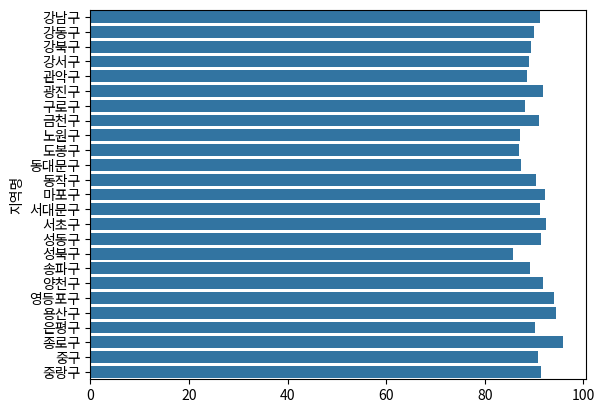

In [274]:
avg_seoul = df_seoul.groupby(by = '지역명')['ratio'].mean()
sns.barplot(y=avg_seoul.index, x=avg_seoul.values)

In [14]:
#현재 강서구 
df_own.loc[(df_own['지역명'] == '강서구')]
df_all.loc[(df_all['지역명'] == '마포구')  & (df_all['gubun'] == 'rent')]
df_all.loc[(df_all['지역명'] == '중구')  & (df_all['gubun'] == 'rent')]

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,...,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52,gubun
4,중구,98.870586,98.686393,98.649147,98.332346,96.326474,95.756558,94.816725,94.355890,93.859068,...,92.257386,92.275563,92.320068,92.735072,92.780202,92.821343,92.821343,92.841815,92.857078,rent
34,중구,100.740910,100.740910,100.740910,100.740910,100.740910,100.740910,100.740910,100.740910,100.740910,...,100.658530,100.658530,100.658530,100.658530,100.658530,100.658530,100.658530,100.658530,100.658530,rent
51,중구,91.648728,91.051139,90.879831,90.382608,89.396871,88.555993,87.701536,87.113214,86.561417,...,74.496439,74.461028,74.410284,74.403308,74.408331,74.381837,74.381837,74.403740,74.420439,rent
60,중구,97.508409,96.729703,96.389208,94.883187,94.389926,92.635925,92.135532,91.309388,90.354560,...,91.678476,91.862144,92.095094,92.432636,92.512601,92.621201,92.760785,92.760785,92.807678,rent
77,중구,97.334522,97.150041,97.149951,96.837703,96.178649,96.041593,95.500262,94.874132,94.596299,...,90.132362,90.066727,90.064789,89.972884,89.913901,89.913901,89.857477,89.806790,89.779342,rent
82,중구,99.901115,99.833847,99.421570,99.370713,99.049133,98.700221,97.686442,96.940760,96.142190,...,91.580491,91.594789,91.639272,91.696404,91.754842,91.787153,91.855645,91.957721,92.038411,rent


In [24]:
df_all_numeric = df_all.select_dtypes(include = 'float64')
df_all.groupby(by = '지역명')[df_all_numeric.columns].mean()
#여기까지함.
#이걸 한 이유는 강서구 / 중구에 같은 일자인데 너무 많은 row가 있어서 평균값으로 대치해주려고함

,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,2022-12-26 00:00:52,...,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
지역명,,,,,,,,,,,,,,,,,,,,,
5개광역시,98.510202,98.289239,98.021431,97.591068,97.208990,96.829619,96.312765,95.930394,95.494206,95.084576,...,87.161438,87.131943,87.115140,87.109030,87.102002,87.096573,87.092961,87.095985,87.092616,87.073487
6개광역시,98.279129,98.025382,97.716339,97.175054,96.726620,96.303991,95.770152,95.348586,94.897981,94.464853,...,86.599135,86.600742,86.606074,86.619859,86.639813,86.653249,86.662893,86.684750,86.697961,86.696987
가평군,NaN,NaN,NaN,103.110833,103.110833,103.110833,103.110833,102.988564,102.873200,102.873200,...,96.975988,96.975988,96.975988,96.975988,96.955731,96.955731,96.955731,96.955731,96.955731,96.689895
강남11개구,99.294946,98.958344,98.474741,98.023562,97.451343,96.849882,96.153926,95.423927,94.701583,94.007573,...,92.260274,92.494196,92.701543,92.888754,93.064167,93.222144,93.315253,93.430022,93.549595,93.653968
강남구,99.543027,99.434991,99.145395,98.727493,98.251542,97.951461,97.296999,96.651981,95.860504,95.316932,...,93.554195,94.007920,94.350276,94.682083,95.095938,95.426095,95.539967,95.740710,95.931341,96.102641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
홍천군,NaN,NaN,NaN,107.210711,107.149462,107.299020,107.695624,107.929091,108.166532,108.295716,...,105.366876,105.665556,105.701664,105.716937,105.716937,105.716937,105.716937,106.056676,106.049114,106.049114
화성시,95.026893,94.608004,94.122708,93.653319,92.892467,92.192566,90.630339,89.791614,88.850436,87.785748,...,84.410621,84.487051,84.627839,84.736287,84.843401,84.957170,85.062285,85.169785,85.295344,85.395645
화순군,NaN,NaN,NaN,103.039116,103.039116,103.039116,103.039116,103.039116,103.039116,103.039116,...,104.522865,104.522865,104.522865,104.557616,104.559503,104.559503,104.559503,104.629758,104.629758,104.629758


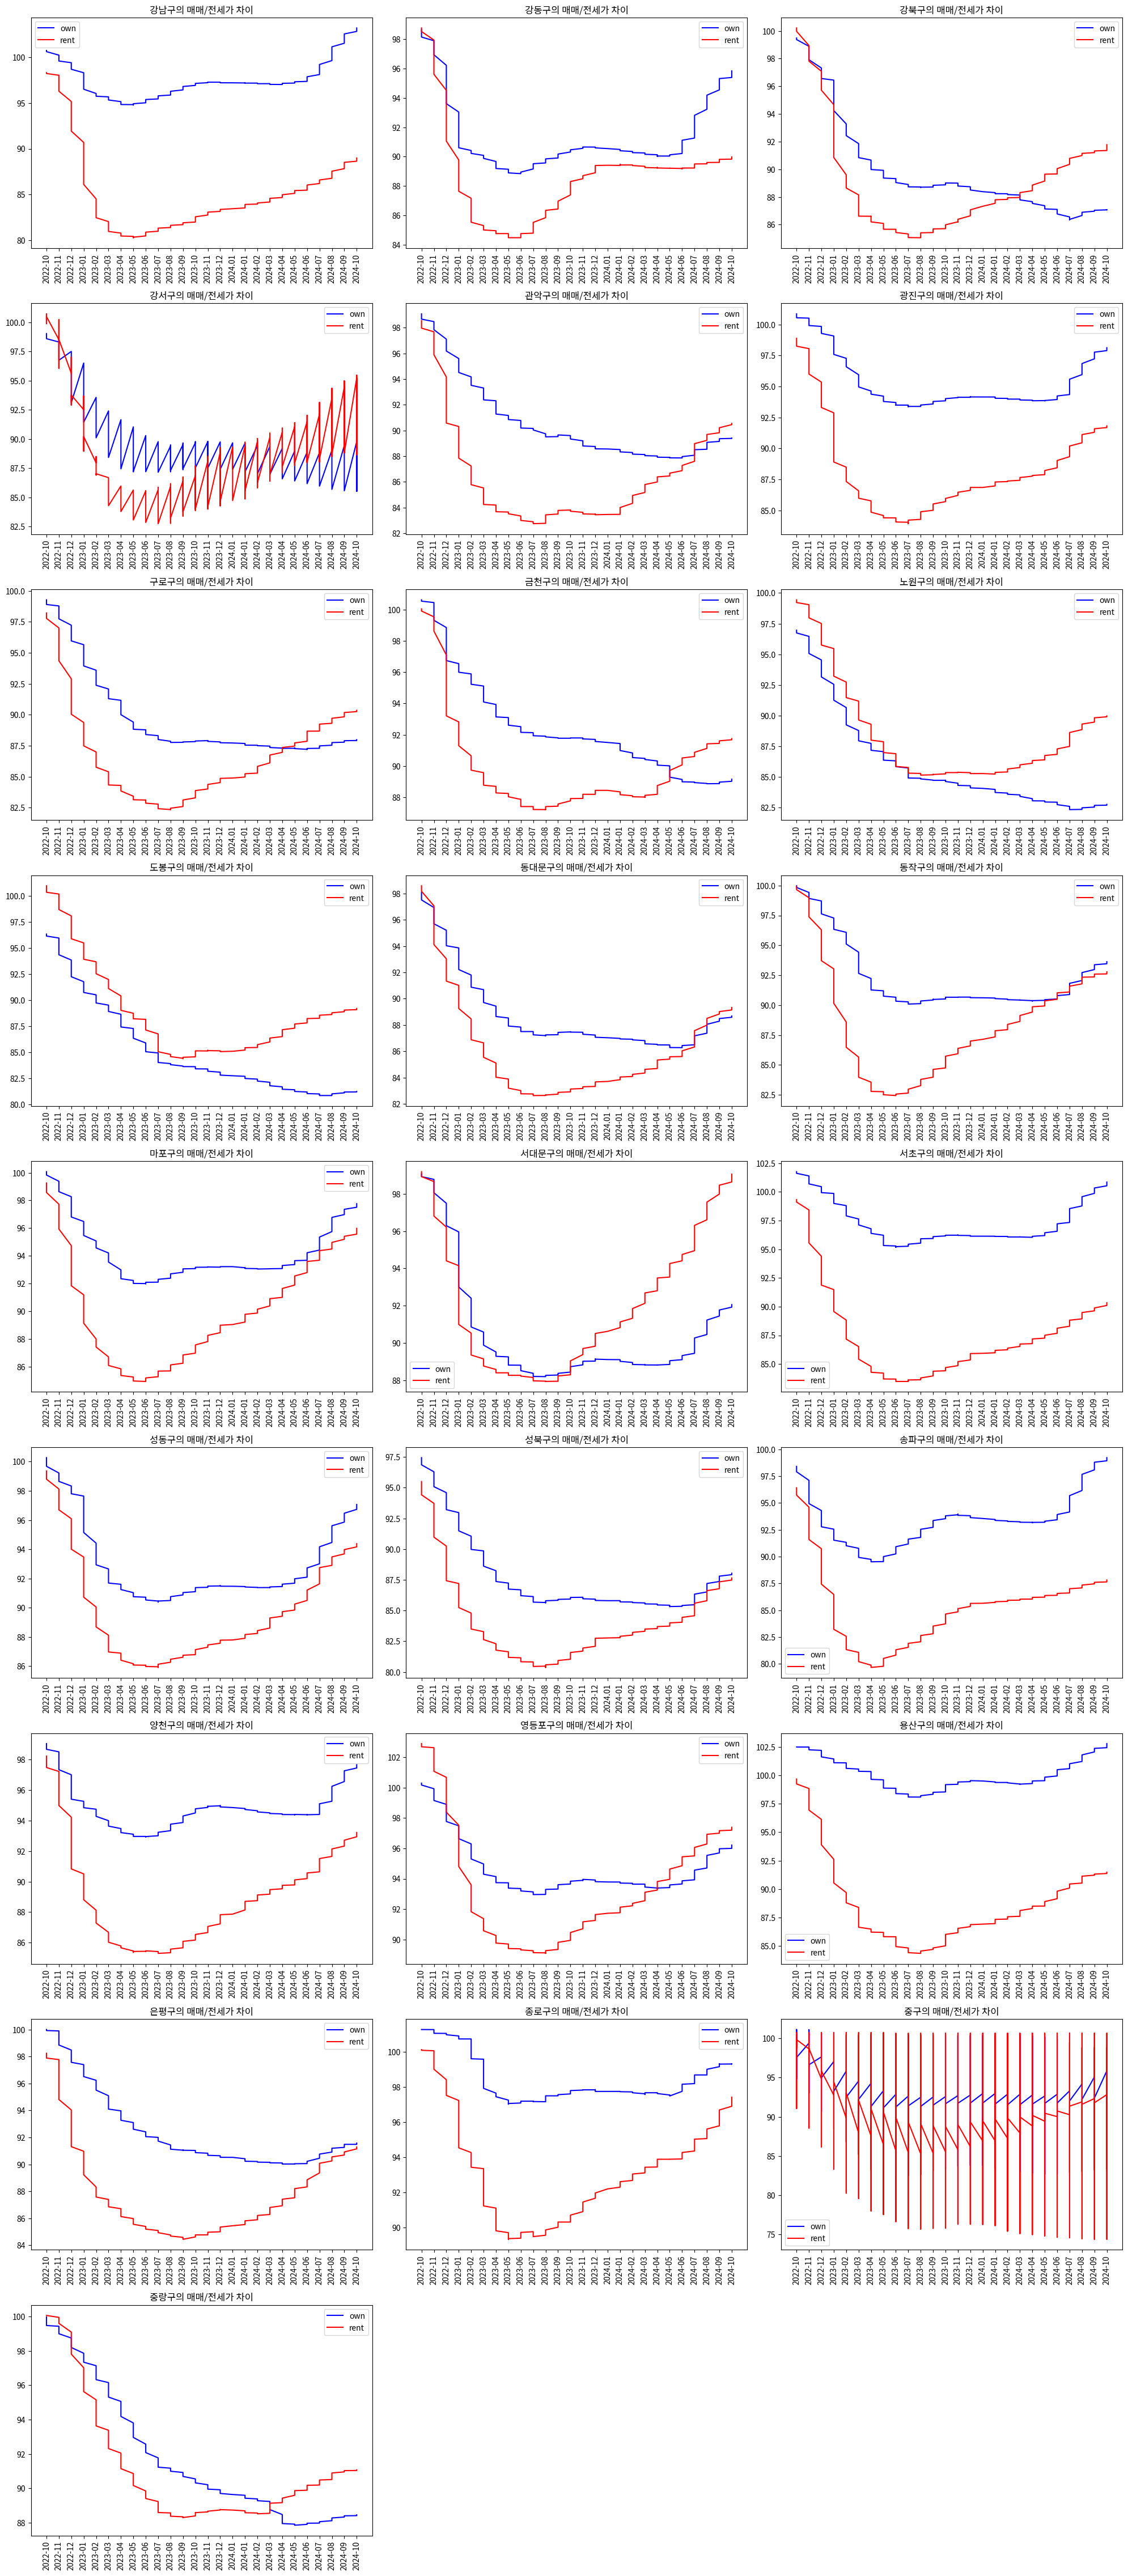

In [127]:
fig = plt.figure(figsize = (20, 50))
for idx, name in enumerate(seoul_area):
    temp_data = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'own')]
    temp_data2 = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'rent')]
    axes = fig.add_subplot(10, 3, idx + 1)
    axes.plot(temp_data["when"], temp_data["ratio"], color='blue')
    axes.plot(temp_data2["when"], temp_data2["ratio"], color='red')
    axes.tick_params(axis='x', rotation=90)
    axes.set_title(name+'의 매매/전세가 차이')
    axes.legend(['own','rent'])

plt.tight_layout()

In [275]:
#지역별 일자별 최대 최소 값 구하기
df_diff = df_seoul.groupby(by = ['지역명', 'when'])['ratio'].max().astype('float64') - df_seoul.groupby(by = ['지역명', 'when'])['ratio'].min().astype('float64')
df_diff = df_diff.reset_index()
df_diff.rename(columns = {'ratio': 'diff'}, inplace = True)
df_diff.sort_values(by='diff', ascending = False)


,지역명,when,diff
622,중구,2024-10,26.276694
621,중구,2024-09,26.276694
620,중구,2024-08,26.197502
619,중구,2024-07,26.088975
618,중구,2024-06,26.012031
...,...,...,...
347,서대문구,2023-07,0.402024
174,구로구,2024-04,0.397060
348,서대문구,2023-08,0.325728
286,동작구,2022-10,0.325101


In [210]:
df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=False).iloc[0]

지역명                     종로구
date    2023-05-08 00:00:52
diff               7.700351
Name: 2249, dtype: object

****************************************************************************************************
최대 : 종로구 2023-03 8.353867073700002
최소 : 종로구 2022-10 1.180774385499987
****************************************************************************************************
****************************************************************************************************
최대 : 중구 2024-10 26.27669353809999
최소 : 중구 2022-10 10.07065644410001
****************************************************************************************************
****************************************************************************************************
최대 : 용산구 2023-10 14.178385530900002
최소 : 용산구 2022-10 3.2465319901999976
****************************************************************************************************
****************************************************************************************************
최대 : 성동구 2023-01 6.927314765800006
최소 : 성동구 2022-10 1.474558192999993
*************

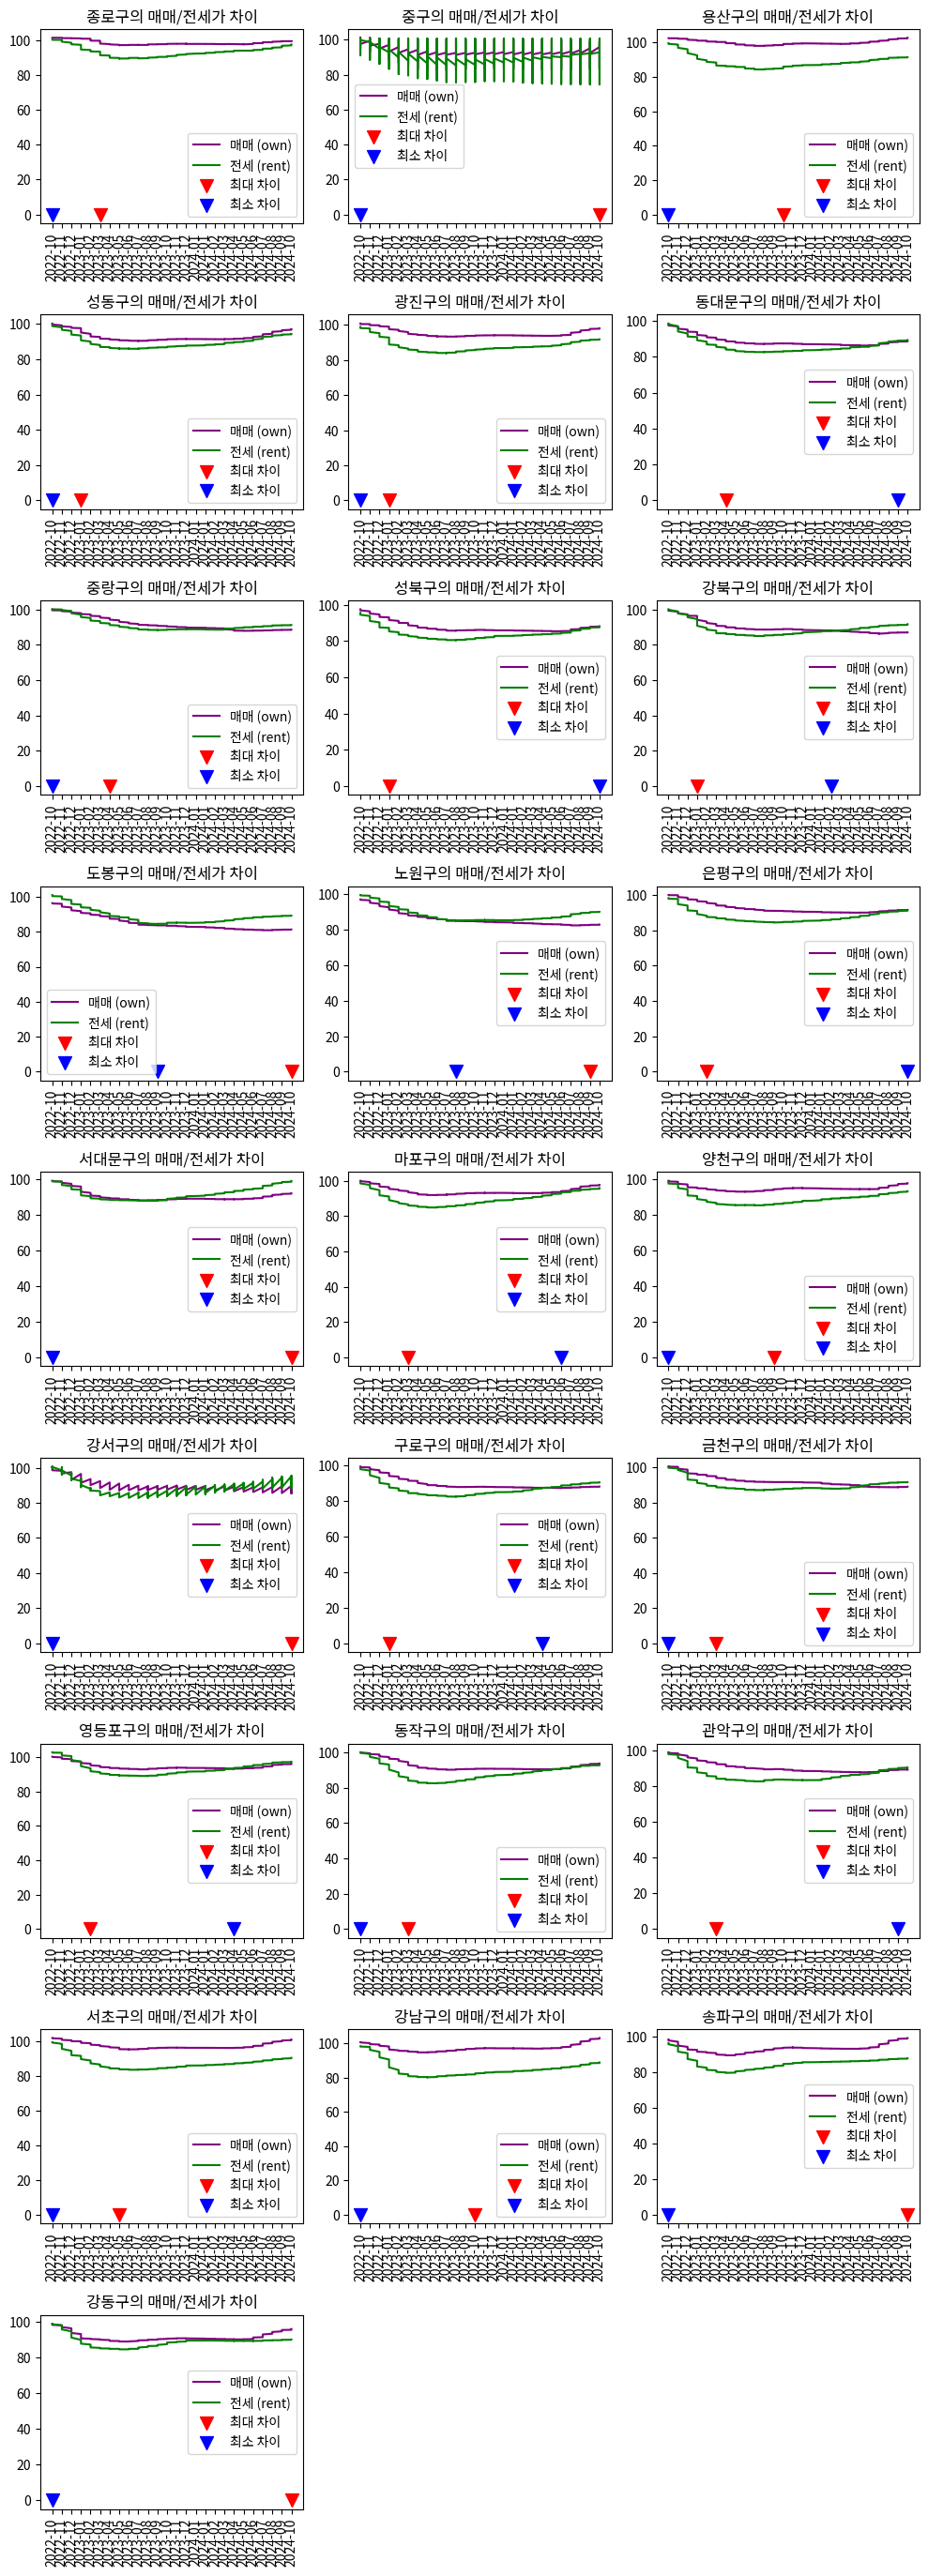

In [278]:
import matplotlib.pyplot as plt

# 낙차 계산 df
df_diff = df_seoul.groupby(by=['지역명', 'when'])['ratio'].max().astype('float64') - \
          df_seoul.groupby(by=['지역명', 'when'])['ratio'].min().astype('float64')
df_diff = df_diff.reset_index()
df_diff.rename(columns={'ratio': 'diff'}, inplace=True)
df_diff.sort_values(by='diff', ascending=False, inplace=True)


fig = plt.figure(figsize=(10, 30))
for idx, name in enumerate(seoul_area):
    
    #지역명이랑 own 구하기
    temp_data_own = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'own')]
    temp_data_rent = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'rent')]
    
    #지역명 중에 낙차 max, min 구하기
    max_diff_value = df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=False).iloc[0]
    min_diff_value = df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=True).iloc[0]

    # 매매 / 전세 트렌트 그래프
    axes = fig.add_subplot(10, 3, idx + 1)
    axes.plot(temp_data_own["when"], temp_data_own["ratio"], color='purple', label='매매 (own)')
    axes.plot(temp_data_rent["when"], temp_data_rent["ratio"], color='green', label='전세 (rent)')
    
    # 산점도로 낙차 max / min 찍어주기, 그림상 y는 0 고정
    axes.scatter(max_diff_value['when'], y = 0, color='red', marker='v', s=100, label='최대 차이')
    axes.scatter(min_diff_value['when'], y = 0, color='blue', marker='v', s=100, label='최소 차이')
    print(f'{'*'*100}')
    print(f'최대 : {max_diff_value['지역명']} {max_diff_value['when']} {max_diff_value['diff']}')
    print(f'최소 : {min_diff_value['지역명']} {min_diff_value['when']} {min_diff_value['diff']}')
    print(f'{'*'*100}')
    
    # 제목 및 축 조절
    axes.set_title(f"{name}의 매매/전세가 차이")
    axes.tick_params(axis='x', rotation=90)
    axes.legend()

plt.tight_layout()
plt.show()


****************************************************************************************************
최대 : 종로구 2023-03 8.353867073700002
최소 : 종로구 2022-10 1.180774385499987
****************************************************************************************************
****************************************************************************************************
최대 : 중구 2024-10 26.27669353809999
최소 : 중구 2022-10 10.07065644410001
****************************************************************************************************
****************************************************************************************************
최대 : 용산구 2023-10 14.178385530900002
최소 : 용산구 2022-10 3.2465319901999976
****************************************************************************************************
****************************************************************************************************
최대 : 성동구 2023-01 6.927314765800006
최소 : 성동구 2022-10 1.474558192999993
*************

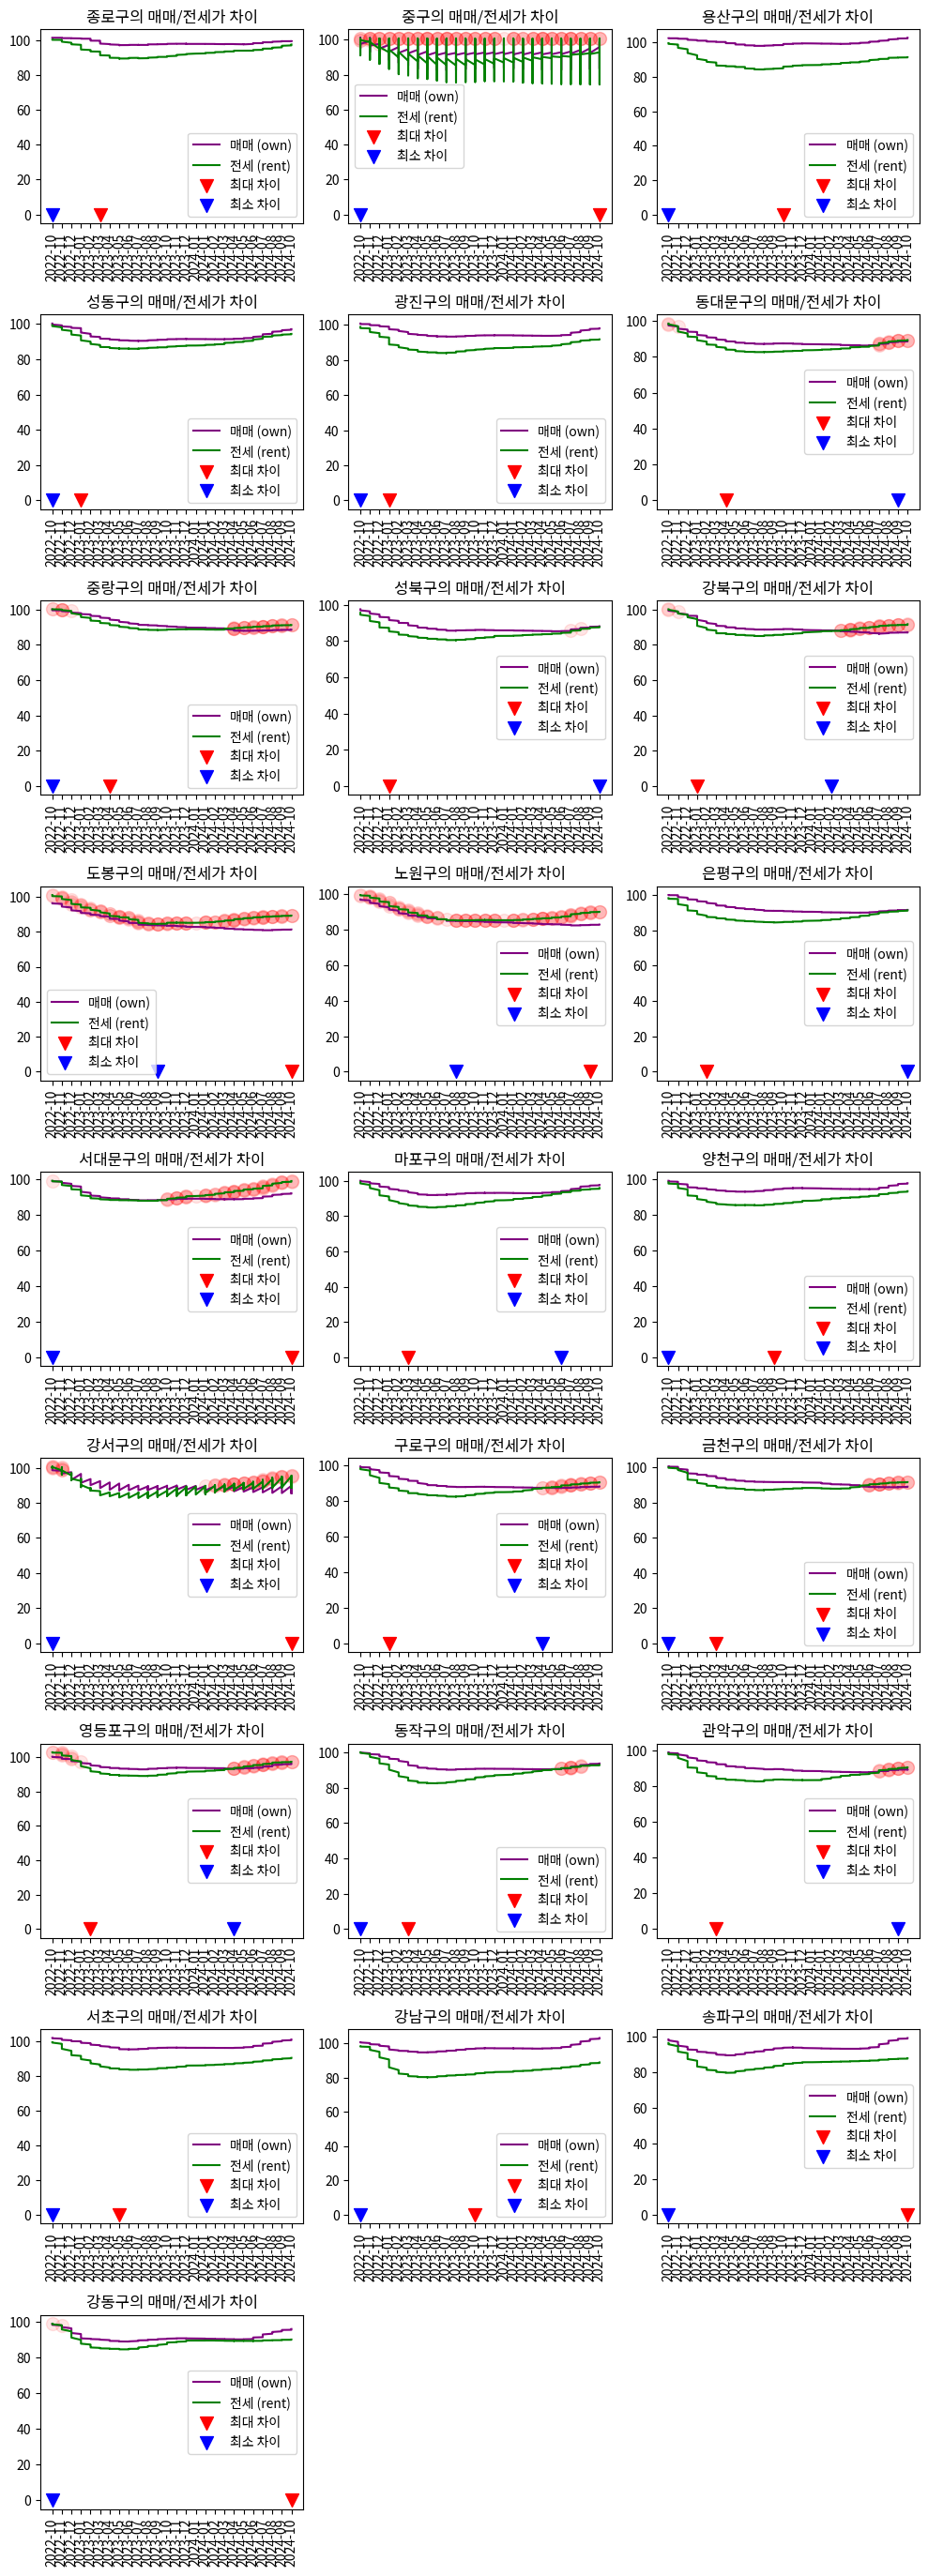

In [277]:
import matplotlib.pyplot as plt

#낙차 계산 df
df_diff = df_seoul.groupby(by=['지역명', 'when'])['ratio'].max().astype('float64') - df_seoul.groupby(by=['지역명', 'when'])['ratio'].min().astype('float64')
df_diff = df_diff.reset_index()
df_diff.rename(columns={'ratio': 'diff'}, inplace=True)
df_diff.sort_values(by='diff', ascending=False, inplace=True)

fig = plt.figure(figsize=(10, 30))
for idx, name in enumerate(seoul_area):
    
    #지역명이랑 own 구하기
    temp_data_own = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'own')]
    temp_data_rent = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'rent')]
    
     #지역명 중에 낙차 max, min 구하기
    max_diff_value = df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=False).iloc[0]
    min_diff_value = df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=True).iloc[0]

    # 매매 / 전세 트렌트 그래프
    axes = fig.add_subplot(10, 3, idx + 1)
    axes.plot(temp_data_own["when"], temp_data_own["ratio"], color='purple', label='매매 (own)')
    axes.plot(temp_data_rent["when"], temp_data_rent["ratio"], color='green', label='전세 (rent)')
    
    # 산점도로 낙차 max / min 찍어주기, 그림상 y는 0 고정
    axes.scatter(max_diff_value['when'], y = 0, color='red', marker='v', s=100, label='최대 차이')
    axes.scatter(min_diff_value['when'], y = 0, color='blue', marker='v', s=100, label='최소 차이')

    #계산 확인용
    print(f'{'*'*100}')
    print(f'최대 : {max_diff_value['지역명']} {max_diff_value['when']} {max_diff_value['diff']}')
    print(f'최소 : {min_diff_value['지역명']} {min_diff_value['when']} {min_diff_value['diff']}')
    print(f'{'*'*100}')

    # 제목 및 축 조절
    for _, row in temp_data_rent.iterrows():
        own_ratio = temp_data_own[temp_data_own["when"] == row["when"]]["ratio"]
        if not own_ratio.empty and row["ratio"] > own_ratio.values[0]:
            # Highlighting with a circle if rent is higher than own
            axes.scatter(row["when"], row["ratio"], color='red', alpha = 0.1, s=100, label="역전세" if idx == 0 else None)
    
    # 제목 및 축 조절
    axes.set_title(f"{name}의 매매/전세가 차이")
    axes.tick_params(axis='x', rotation=90)
    axes.legend()

plt.tight_layout()
plt.show()


# 분석보고서

- 종로구  
2023년 최대를 기점으로 점점 전세가율이 줄어드는 추세

- 중구  
데이터 전처리 추가적으로 필요

- 용산구  
2023년 10월 최대를 기점으로 줄어드는 듯하나 별 차이 없음

- 성동구  
2023년 01월 최대를 기점으로 좁혀지는 듯 보이나, 최근 다시 전세가율이 줄어듬

- 광진구  
2023년 01월 최대를 기점으로 전세가율이 조금씩 늘어나는 모습이지만, 매매와 전세가가 평행함
  
- 동대문구  
최근 전세가율이 높아져, 역전세가 발생한 시기

- 중랑구  
역전세가 심해짐 투자 주의

- 성북구  
역전세 발생 가능함 투자 주의

- 강북구  
역전세 발생

- 도봉구  
역전세가 해소되지 못한 지역

- 노원구  
역전세가 해소되지 못한 지역

- 은평구  
역전세가 발생할 수 있음

- 서대문구  
역전세가 심화되는 중

- 마포구  
전세가율이 조금씩 높아지는 중


# 아래는 버릴거

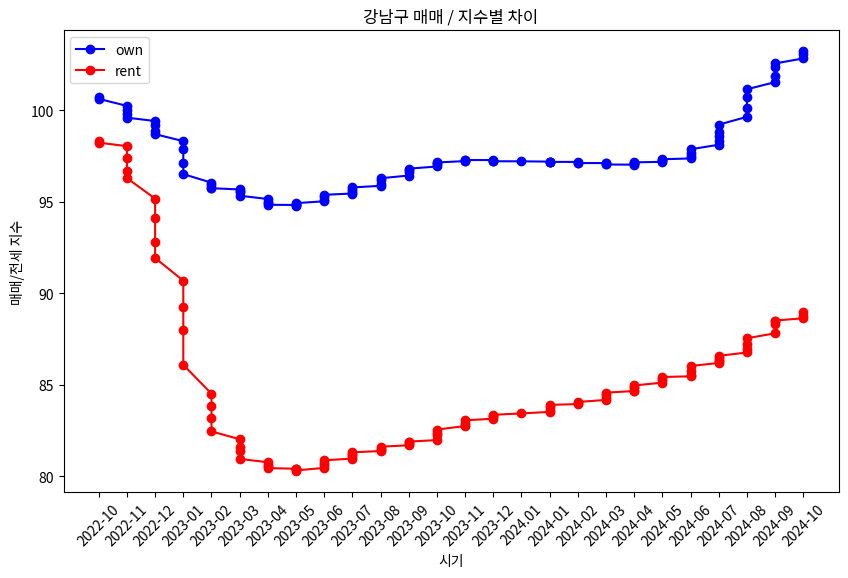

In [80]:


df_gangnam_own = df_seoul[(df_seoul["지역명"] == "강남구") & (df_seoul["gubun"] == "own")]
df_gangnam_rent = df_seoul[(df_seoul["지역명"] == "강남구") & (df_seoul["gubun"] == "rent")]

# Plotting the trend for "강남구" over time
plt.figure(figsize=(10, 6))
plt.plot(df_gangnam_own["when"], df_gangnam_own["ratio"], marker='o', color='blue')
plt.plot(df_gangnam_rent["when"], df_gangnam_rent["ratio"], marker='o', color='red')

plt.xlabel("시기")
plt.ylabel("매매/전세 지수")
plt.title("강남구 매매 / 지수별 차이")
plt.legend(['own', 'rent'])
plt.xticks(rotation=45)
plt.show()


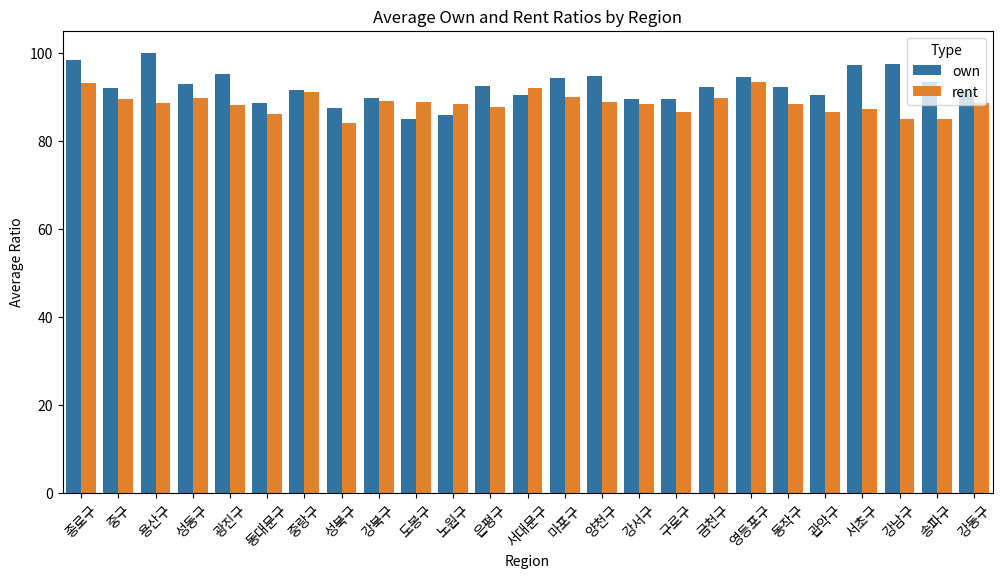

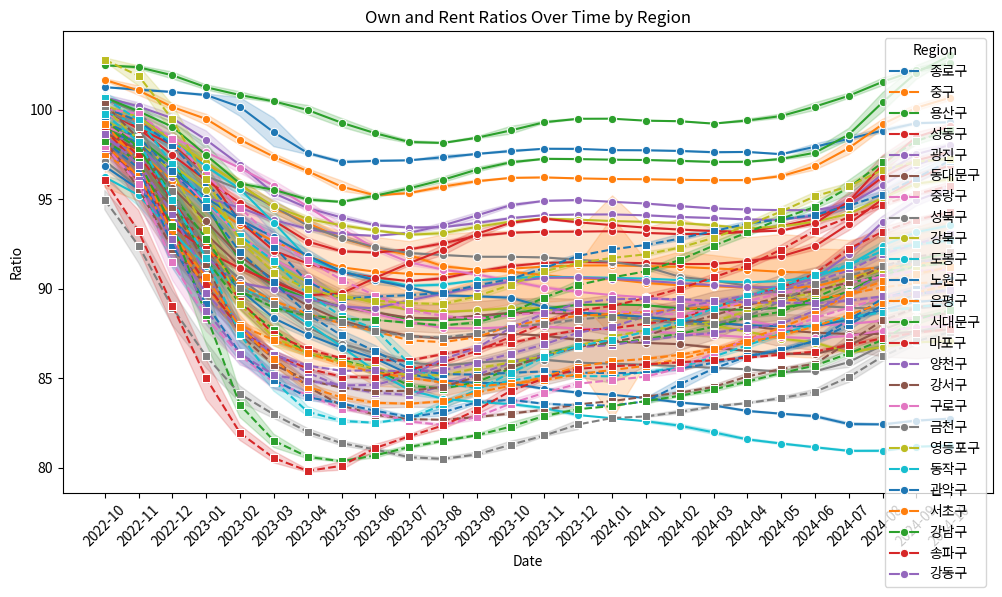

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [262]:
# 1. Bar plot showing the average 'own' and 'rent' values by region
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_seoul, x="지역명", y="ratio", hue="gubun", ci=None, ax=ax1)
ax1.set_title("Average Own and Rent Ratios by Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Average Ratio")
ax1.legend(title="Type")
plt.xticks(rotation=45)
plt.show()

# 2. Line plot showing trend of 'own' and 'rent' over time by region
fig, ax2 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_seoul[df_seoul["gubun"] == "own"], x="when", y="ratio", hue="지역명", marker="o", ax=ax2, palette="tab10")
sns.lineplot(data=df_seoul[df_seoul["gubun"] == "rent"], x="when", y="ratio", hue="지역명", marker="s", ax=ax2, palette="tab10", linestyle="--", legend=False)
ax2.set_title("Own and Rent Ratios Over Time by Region")
ax2.set_xlabel("Date")
ax2.set_ylabel("Ratio")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()

# 3. Heatmap of the difference (diff) between own and rent ratios by region over time
df_pivot_diff = df_diff.pivot("지역명", "when", "diff")
fig, ax3 = plt.subplots(figsize=(10, 8))
sns.heatmap(df_pivot_diff, annot=True, fmt=".2f", cmap="YlOrBr", ax=ax3)
ax3.set_title("Difference Between Own and Rent Ratios by Region and Date")
ax3.set_xlabel("Date")
ax3.set_ylabel("Region")
plt.show()


# 4. Distribution of ratio differences
fig, ax4 = plt.subplots(figsize=(10, 6))
sns.histplot(df_diff["diff"], kde=True, color="skyblue", bins=10, ax=ax4)
ax4.set_title("Distribution of Ratio Differences Between Own and Rent")
ax4.set_xlabel("Difference")
ax4.set_ylabel("Frequency")
plt.show()

# 5. Scatter plot with regression of max and min ratios across regions
fig, ax5 = plt.subplots(figsize=(10, 6))
sns.regplot(data=df_diff, x="max_ratio", y="min_ratio", color="salmon", ax=ax5)
ax5.set_title("Scatter Plot with Regression of Max and Min Ratios by Region")
ax5.set_xlabel("Max Ratio")
ax5.set_ylabel("Min Ratio")
plt.show()

In [341]:
#컬럼명을 바꿔주기
df_date_all = df_all.columns.astype('str').str[:7]

for i,j in enumerate(df_date_all):
    df_all.rename(columns = {df_all.columns[i] : j}, inplace = True)
df_all.columns

Index(['지역명', '2022-10', '2022-10', '2022-11', '2022-11', '2022-11', '2022-11',
       '2022-12', '2022-12', '2022-12',
       ...
       '2024-08', '2024-08', '2024-09', '2024-09', '2024-09', '2024-09',
       '2024-10', '2024-10', '2024-10', 'gubun'],
      dtype='object', length=103)

In [340]:
df_all.columns

Index(['지역명', '2022-10-24 00:00:52', '2022-10-31 00:00:52',
       '2022-11-07 00:00:52', '2022-11-14 00:00:52', '2022-11-21 00:00:52',
       '2022-11-28 00:00:52', '2022-12-05 00:00:52', '2022-12-12 00:00:52',
       '2022-12-19 00:00:52',
       ...
       '2024-08-19 00:00:52', '2024-08-26 00:00:52', '2024-09-02 00:00:52',
       '2024-09-09 00:00:52', '2024-09-23 00:00:52', '2024-09-30 00:00:52',
       '2024-10-07 00:00:52', '2024-10-14 00:00:52', '2024-10-21 00:00:52',
       'gubun'],
      dtype='object', length=103)

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,2022-12-26 00:00:52,2023-01-02 00:00:52,2023-01-09 00:00:52,2023-01-16 00:00:52,2023-01-30 00:00:52,2023-02-06 00:00:52,2023-02-13 00:00:52,2023-02-20 00:00:52,2023-02-27 00:00:52,2023-03-06 00:00:52,2023-03-13 00:00:52,2023-03-20 00:00:52,2023-03-27 00:00:52,2023-04-03 00:00:52,2023-04-10 00:00:52,2023-04-17 00:00:52,2023-04-24 00:00:52,2023-05-01 00:00:52,2023-05-08 00:00:52,2023-05-15 00:00:52,2023-05-22 00:00:52,2023-05-29 00:00:52,2023-06-05 00:00:52,2023-06-12 00:00:52,2023-06-19 00:00:52,2023-06-26 00:00:52,2023-07-03 00:00:52,2023-07-10 00:00:52,2023-07-17 00:00:52,2023-07-24 00:00:52,2023-07-31 00:00:52,2023-08-07 00:00:52,2023-08-14 00:00:52,2023-08-21 00:00:52,2023-08-28 00:00:52,2023-09-04 00:00:52,2023-09-11 00:00:52,2023-09-18 00:00:52,2023-09-25 00:00:52,2023-10-09 00:00:52,2023-10-16 00:00:52,2023-10-23 00:00:52,2023-10-30 00:00:52,2023-11-06 00:00:52,2023-11-13 00:00:52,2023-11-20 00:00:52,2023-11-27 00:00:52,2023-12-04 00:00:52,2023-12-11 00:00:52,2023-12-18 00:00:52,2023-12-25 00:00:52,2024.01.01,2024-01-08 00:00:52,2024-01-15 00:00:52,2024-01-22 00:00:52,2024-01-29 00:00:52,2024-02-05 00:00:52,2024-02-19 00:00:52,2024-02-26 00:00:52,2024-03-04 00:00:52,2024-03-11 00:00:52,2024-03-18 00:00:52,2024-03-25 00:00:52,2024-04-01 00:00:52,2024-04-08 00:00:52,2024-04-15 00:00:52,2024-04-22 00:00:52,2024-04-29 00:00:52,2024-05-06 00:00:52,2024-05-13 00:00:52,2024-05-20 00:00:52,2024-05-27 00:00:52,2024-06-03 00:00:52,2024-06-10 00:00:52,2024-06-17 00:00:52,2024-06-24 00:00:52,2024-07-01 00:00:52,2024-07-08 00:00:52,2024-07-15 00:00:52,2024-07-22 00:00:52,2024-07-29 00:00:52,2024-08-05 00:00:52,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52,gubun
0,전국,99.070849,98.795106,98.501147,98.057422,97.670740,97.354538,96.888385,96.569873,96.149852,95.792512,95.439004,95.081119,94.724287,94.349139,93.963412,93.626154,93.290910,93.041542,92.787613,92.481888,92.082914,91.858702,91.601077,91.424186,91.195593,91.044424,90.922331,90.805239,90.647565,90.547996,90.482128,90.418179,90.328878,90.243497,90.183055,90.143591,90.089143,90.047111,90.031037,90.016634,90.004161,90.011772,90.026286,90.050100,90.064808,90.088355,90.112390,90.135376,90.151876,90.171682,90.186603,90.187561,90.189461,90.177104,90.151897,90.132002,90.113965,90.080022,90.055389,90.038901,90.007688,89.976864,89.940106,89.908815,89.872646,89.842256,89.812152,89.765482,89.736383,89.697577,89.666257,89.636044,89.585278,89.549447,89.503353,89.471157,89.441427,89.414999,89.387179,89.363883,89.329602,89.315738,89.302354,89.296853,89.288007,89.288654,89.279612,89.300558,89.315659,89.344631,89.360992,89.405868,89.439824,89.486678,89.530720,89.566492,89.596423,89.615430,89.641072,89.660654,89.659354,own
1,서울,99.189460,98.891016,98.575584,98.216480,97.889642,97.564187,97.155318,96.809521,96.361279,95.981527,95.668342,95.300080,94.784047,94.304595,93.932798,93.649544,93.316419,93.102016,92.819696,92.552918,92.296028,92.059424,91.834500,91.655686,91.413187,91.239915,91.118351,91.006237,90.854141,90.755148,90.719169,90.669577,90.595380,90.532372,90.483328,90.462797,90.389633,90.330563,90.310700,90.311345,90.307249,90.338585,90.407692,90.475961,90.511208,90.577885,90.635056,90.681143,90.732588,90.786965,90.820288,90.822780,90.832509,90.821491,90.808185,90.784605,90.762849,90.725487,90.688851,90.665449,90.634893,90.590049,90.551125,90.520035,90.475242,90.442043,90.401570,90.371379,90.339977,90.307675,90.273825,90.238648,90.182792,90.165025,90.158002,90.149290,90.132059,90.133732,90.129838,90.140894,90.157618,90.189594,90.241606,90.307135,90.407858,90.486980,90.591214,90.746237,90.921262,91.121229,91.319067,91.555361,91.783405,92.008437,92.208397,92.3

In [290]:
df_all[df_all.columns[1:-1]]

,2022-10,2022-10,2022-10,2022-10,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-11,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2022-12,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-01,2023-02,2023-02,2023-02,2023-02,2023-02,2023-02,2023-02,2023-02,...,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-07,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-08,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-09,2024-10,2024-10,2024-10,2024-10,2024-10,2024-10,2024-10,2024-10,2024-10
0,99.070849,98.795106,99.070849,98.795106,98.501147,98.057422,97.67074,97.354538,98.501147,98.057422,97.67074,97.354538,98.501147,98.057422,97.67074,97.354538,98.501147,98.057422,97.67074,97.354538,96.888385,96.569873,96.149852,95.792512,96.888385,96.569873,96.149852,95.792512,96.888385,96.569873,96.149852,95.792512,96.888385,96.569873,96.149852,95.792512,95.439004,95.081119,94.724287,94.349139,95.439004,95.081119,94.724287,94.349139,95.439004,95.081119,94.724287,94.349139,95.439004,95.081119,94.724287,94.349139,93.963412,93.626154,93.29091,93.041542,93.963412,93.626154,93.29091,93.041542,...,89.279612,89.300558,89.315659,89.344631,89.288654,89.279612,89.300558,89.315659,89.344631,89.288654,89.279612,89.300558,89.315659,89.344631,89.288654,89.279612,89.300558,89.315659,89.344631,89.360992,89.405868,89.439824,89.486678,89.360992,89.405868,89.439824,89.486678,89.360992,89.405868,89.439824,89.486678,89.360992,89.405868,89.439824,89.486678,89.530720,89.566492,89.596423,89.615430,89.530720,89.566492,89.596423,89.615430,89.530720,89.566492,89.596423,89.615430,89.530720,89.566492,89.596423,89.615430,89.641072,89.660654,89.659354,89.641072,89.660654,89.659354,89.641072,89.660654,89.659354
1,99.18946,98.891016,99.18946,98.891016,98.575584,98.21648,97.889642,97.564187,98.575584,98.21648,97.889642,97.564187,98.575584,98.21648,97.889642,97.564187,98.575584,98.21648,97.889642,97.564187,97.155318,96.809521,96.361279,95.981527,97.155318,96.809521,96.361279,95.981527,97.155318,96.809521,96.361279,95.981527,97.155318,96.809521,96.361279,95.981527,95.668342,95.30008,94.784047,94.304595,95.668342,95.30008,94.784047,94.304595,95.668342,95.30008,94.784047,94.304595,95.668342,95.30008,94.784047,94.304595,93.932798,93.649544,93.316419,93.102016,93.932798,93.649544,93.316419,93.102016,...,90.591214,90.746237,90.921262,91.121229,90.486980,90.591214,90.746237,90.921262,91.121229,90.486980,90.591214,90.746237,90.921262,91.121229,90.486980,90.591214,90.746237,90.921262,91.121229,91.319067,91.555361,91.783405,92.008437,91.319067,91.555361,91.783405,92.008437,91.319067,91.555361,91.783405,92.008437,91.319067,91.555361,91.783405,92.008437,92.208397,92.354427,92.520904,92.603639,92.208397,92.354427,92.520904,92.603639,92.208397,92.354427,92.520904,92.603639,92.208397,92.354427,92.520904,92.603639,92.700462,92.815979,92.886076,92.700462,92.815979,92.886076,92.700462,92.815979,92.886076
2,98.642112,98.340583,98.642112,98.340583,98.052583,97.612834,97.32794,97.032485,98.052583,97.612834,97.32794,97.032485,98.052583,97.612834,97.32794,97.032485,98.052583,97.612834,97.32794,97.032485,96.620466,96.316564,95.883823,95.523678,96.620466,96.316564,95.883823,95.523678,96.620466,96.316564,95.883823,95.523678,96.620466,96.316564,95.883823,95.523678,95.199349,94.860519,94.292981,93.800264,95.199349,94.860519,94.292981,93.800264,95.199349,94.860519,94.292981,93.800264,95.199349,94.860519,94.292981,93.800264,93.355514,93.03027,92.57035,92.314046,93.355514,93.03027,92.57035,92.314046,...,87.991757,88.121333,88.226486,88.340533,8

In [339]:
df_all.loc[273, '2022-10']

KeyError: '2022-10'